In [168]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [169]:
#from google.colab import drive
#drive.mount('/content/drive')

In [170]:
# Importing the necessaries modules

import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels as sm
import xgboost as xg
from sklearn.model_selection import *
from sklearn import *
from xgboost import *
from sklearn.metrics import *
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import Data

In [171]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_result = pd.read_csv("sample_submission.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Categorical Variables

In [172]:
test = test.merge(test_result, on = 'PassengerId')
test.drop(columns ='PassengerId', inplace = True)

In [173]:
train.drop(columns = ['PassengerId', 'Name', 'Cabin'], inplace=True)
test.drop(columns = [ 'Name', 'Cabin'], inplace=True)
dummies_col = ['HomePlanet', 'Destination']
booleans = ['CryoSleep', 'VIP', 'Transported']

In [174]:
def get_categorical(data):
    for b in booleans:
        data[b].replace([True, False], [1,0], inplace=True)

    for d in dummies_col:
        dummies = pd.get_dummies(data[d], prefix=d, prefix_sep='_', drop_first=True)
        data = pd.concat([data, dummies], axis='columns')

    data = data.drop(dummies_col, axis='columns')
    return data

test = pd.DataFrame(get_categorical(test))
train = pd.DataFrame(get_categorical(train))

# Cleaning nan data

In [175]:
for col in train.columns:
    print(col,' ', sum(train[col].isna()))

CryoSleep   217
Age   179
VIP   203
RoomService   181
FoodCourt   183
ShoppingMall   208
Spa   183
VRDeck   188
Transported   0
HomePlanet_Europa   0
HomePlanet_Mars   0
Destination_PSO J318.5-22   0
Destination_TRAPPIST-1e   0


In [176]:
for col in train.columns:
    train = train[~train[col].isna()]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  7251 non-null   float64
 1   Age                        7251 non-null   float64
 2   VIP                        7251 non-null   float64
 3   RoomService                7251 non-null   float64
 4   FoodCourt                  7251 non-null   float64
 5   ShoppingMall               7251 non-null   float64
 6   Spa                        7251 non-null   float64
 7   VRDeck                     7251 non-null   float64
 8   Transported                7251 non-null   int64  
 9   HomePlanet_Europa          7251 non-null   uint8  
 10  HomePlanet_Mars            7251 non-null   uint8  
 11  Destination_PSO J318.5-22  7251 non-null   uint8  
 12  Destination_TRAPPIST-1e    7251 non-null   uint8  
dtypes: float64(8), int64(1), uint8(4)
memory usage: 

In [ ]:
for col in test.columns:
    test = test[~test[col].isna()]
test.info()

# Iniciating instances

In [178]:
yTrain = pd.DataFrame(train['Transported']).copy()
xTrain = train.drop(columns = ['Transported'], axis =1,).copy()
xTrain, xTest, yTrain, yTest = train_test_split(xTrain, yTrain, test_size=0.3, random_state=2)

#yTrain = pd.DataFrame(train['Transported'])
#xTrain = train.drop(columns = ['Transported'], axis =1,)

#yTest = pd.DataFrame(test['Transported'])
#xTest = test.drop(columns = ['Transported'], axis =1,)


In [ ]:
xgb = XGBClassifier()
logreg = linear_model.LogisticRegressionCV(solver='lbfgs')
knn = neighbors.KNeighborsClassifier(5)
svcl = svm.SVC()
adb = ensemble.AdaBoostClassifier()
dtclf = tree.DecisionTreeClassifier(max_depth=5)
rfclf = ensemble.RandomForestClassifier()

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', linear_model.LogisticRegressionCV(solver='lbfgs', max_iter=10000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', neighbors.KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('ADB', ensemble.AdaBoostClassifier()))
models.append(('RF', ensemble.RandomForestClassifier()))
models.append(('SVC', svm.SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  cv_results = model_selection.cross_val_score(model, xTrain, yTrain, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  accuracy = "%s: %.2f%% (%.2f)" % (name, cv_results.mean(), cv_results.std())
  print(accuracy)


# Evaluate models

## XGBoost Model With Learning Curves

In [ ]:
yTest.info()

In [ ]:
model = XGBClassifier()
eval_set = [(xTrain, yTrain), (xTest, yTest)]
model.fit(xTrain, yTrain, eval_metric=["error", "logloss"],
early_stopping_rounds=100,eval_set=eval_set, verbose=True)
# make predictions for test data
yPred = model.predict(xTest)
predictions = [round(value) for value in yPred]
# evaluate predictions
accuracy = accuracy_score(list(np.ravel(yTest)), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

## Log loss plot

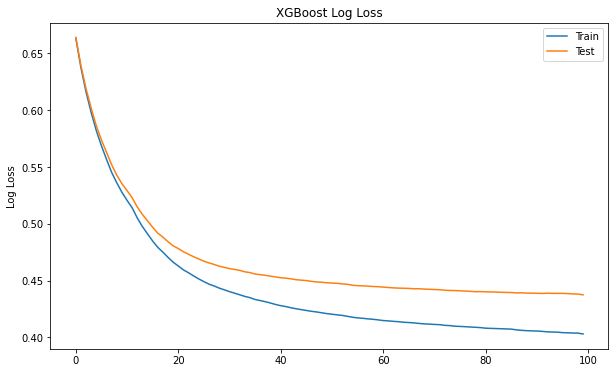

In [180]:
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

## Grid Search

In [ ]:
parameters = {'nthread':[4], 'objective':['binary:logistic'], 'learning_rate': [0.1, 0.03, 0.05, 0.07], 'max_depth': [3, 5, 6],'min_child_weight': [4],'silent': [1],'subsample': [0.7],'colsample_bytree': [0.7],'n_estimators': [100, 200, 300, 500]}
clfGrid = GridSearchCV(model, parameters, n_jobs = 5,verbose=True)
clfGrid.fit(xTrain,yTrain)
print(clfGrid.best_score_)
print(clfGrid.best_params_)

In [181]:
#weights = (y == 0).sum() / (1.0 * (y == 1).sum())
#est Model
#xgbFinalModel = XGBClassifier(max_depth = 5,learning_rate= 0.05, min_child_weight= 4, n_estimators= 200, nthread= 4, subsample=0.7, colsample_bytree=0.7, objective= "binary:logistic")
xgbFinalModel = XGBClassifier(max_depth = 3,learning_rate= 0.1, min_child_weight= 3, n_estimators= 100, nthread= 4, subsample=0.7, colsample_bytree=0.7, objective= "binary:logistic")

## Accuracy

In [ ]:
results = cross_val_score(xgbFinalModel, xTrain, yTrain)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
probabilities = xgbFinalModel.fit(xTrain, yTrain, eval_metric = 'auc').predict_proba(xTest)
probabilities = pd.DataFrame(probabilities)
probabilities_list = pd.DataFrame(np.where(probabilities[0] < probabilities[0], 0, 1))
probabilities_list[0].astype('category')
yTest['Transported'].astype('category')
number = round(accuracy_score(list(yTest['Transported']), probabilities_list[0])*100, 2).astype(str) + '%'
print('AUPRC = {}'.format(number))

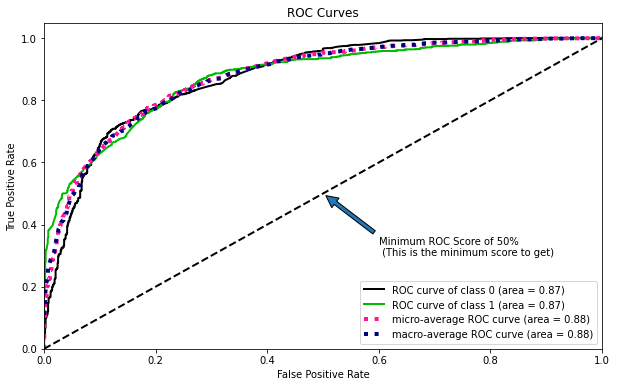

In [183]:
yPred = np.array(xgbFinalModel.predict_proba(xTest))
yTest['Transported'][0] = 1
y_Test = yTest.astype(int).copy()

plt.rcParams['figure.figsize'] = [10, 6]
skplt.metrics.plot_roc(pd.DataFrame(y_Test['Transported']), pd.DataFrame(yPred*1.5))
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',xy=(0.5, 0.5),xytext=(0.6, 0.3), arrowprops = dict(shrink=0.05),)
plt.show()